<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-Internship/blob/master/Zindi_CustomerPredictnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.utils import shuffle
import time

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test (1).csv


In [24]:
import io
train = pd.read_csv('Train.csv')
train.head()
train = train.drop('Applicant_ID', axis=1)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [25]:
test = pd.read_csv('Test.csv')
Applicant_ID = test['Applicant_ID']
test.head()
test.shape

(24000, 51)

In [26]:
train= train.fillna(method='bfill') # filling missing values in training dataset
test = test.fillna(method='ffill')

In [27]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
describe_data(train)

Data Types:
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38      float64


In [28]:
train.groupby(['default_status','form_field47'])['form_field47'].count()

default_status  form_field47
no              charge          24846
                lending         17439
yes             charge          11527
                lending          2188
Name: form_field47, dtype: int64

**Pre-Processing**

**Using Label encoder for further pre-processing**

In [29]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train['form_field47_new'] = lb_make.fit_transform(train['form_field47'])
train = train.drop('form_field47', axis=1 )
#train.head()

In [30]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train['default_status_new'] = lb_make.fit_transform(train['default_status'])
train = train.drop('default_status', axis=1 )
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_new,default_status_new
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,11385.24,14584.29,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,14508.0,1052.0,8.0000,2.0,0.0,12.0,12.0,4.0,0.0,149.6805,149.019,0.392854,2.02,0.711632,0.0,0.0,349.805730,1.129518,0.044335,0,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,14508.0,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,149.6805,149.019,0.314281,8.08,0.183584,0.0,0.0,349.805730,1.620483,0.322436,0,0
2,3276.0,0.53845,3.1510,0.0,6.282,192166.0,956940.0,385499.0,192944.0,1079864.0,396391.0,771776.0,0.0,16576457,22452691.0,0.0,0.0,0.0,0.0,0.0,120.120,8580.00,0.00,85.800,1597.5,4746.0,3164.0,60.0,15696.0,12958.0,14508.0,70.0,0.6666,0.0,1.0,12.0,0.0,6.0,0.0,149.6805,149.019,0.162965,18.18,0.791136,0.0,0.0,89.940100,1.513370,0.011640,0,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,396391.0,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,12958.0,5202.0,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,150.0135,149.019,0.488884,2.02,0.685168,0.0,0.0,89.940100,0.664452,0.082729,0,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,149.019,0.275000,12.12,0.438168,0.0,0.0,97.887502,1.427891,0.045630,0,0


Text(0.5, 1.0, 'Correlation matrix')

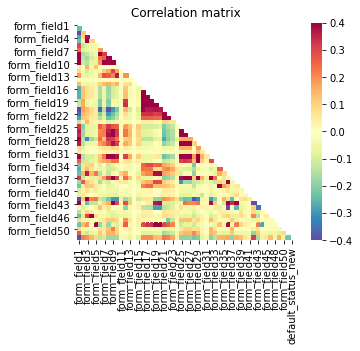

In [34]:
train.corr().round(3)

corrs = train.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

**Transformation and Segmentation**

In [35]:
from sklearn.model_selection import train_test_split
y = train['default_status_new']
X = train.drop('default_status_new', axis=1)
# y.isnull().any()
X = X.fillna(method='ffill')

In [36]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
features = trans.fit_transform(X)

In [37]:
y = LabelEncoder().fit_transform(y.astype('str'))
labels = y
labels = np.reshape(labels, (-1, 1))

**Training the model**

In [38]:
# import packages
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from statistics import *

**Logistic Regression and LR with liblinear**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size =0.2, random_state=42, stratify = labels)
print('X_train.shape', X_train.shape, 'y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape, 'y_test.shape', y_test.shape)

X_train.shape (44800, 50) y_train.shape (44800, 1)
X_test.shape (11200, 50) y_test.shape (11200, 1)


In [40]:
from sklearn.linear_model import LogisticRegression
sklearn_lr = LogisticRegression()
print(sklearn_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [41]:
# Train the logistic regression model using scikit-learn 
sklearn_lr.fit(X_train, y_train)
sklearn_pred = sklearn_lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print(sklearn_pred,len(sklearn_pred))
print (accuracy_score(y_test, sklearn_pred))
print(mean_squared_error(y_test, sklearn_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0] 11200
0.7991071428571429
0.20089285714285715


In [42]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
labels, target = make_classification(n_samples=50400, n_features=50, n_informative=5, n_redundant=5, random_state=42)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(labels, target, test_size=0.3, random_state=42)
# fit the model
models = LogisticRegression(solver='liblinear')
models.fit(X_train, y_train)
# evaluate the model
yhat = models.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.87


**Using XGboost Classifier**

Feature: 0, Score: 0.26259
Feature: 1, Score: 0.00095
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.09024
Feature: 9, Score: 0.15641
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.07669
Feature: 13, Score: 0.00178
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00086
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00198
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00155
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.03603
Feature: 26, Score: 0.00081
Feature: 27, Score: 0.00067
Feature: 28, Score: 0.00089
Feature: 29, Score: 0.00083
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00127
Feature: 33, Score: 0.09417
Feature: 34, Score: 0.08531
Feature: 35, Score: 0.00000
Fe

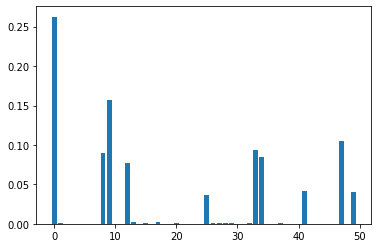

In [43]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
labels, target = make_classification(n_samples=50400, n_features=50, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(labels, target)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([labels for labels in range(len(importance))], importance)
pyplot.show() # ten important features needed for prediction

In [44]:
# define the dataset
labels, target = make_classification(n_samples=50400, n_features=50, n_informative=5, n_redundant=5, random_state=42)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(labels, target, test_size=0.3, random_state=1)
# fit the model
# define the model
model = XGBClassifier()
# fit the model
model.fit(labels, target)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 96.49


**Random Forest Model with Scikit Learn**

In [26]:
from sklearn.ensemble import RandomForestClassifier
labels, target = make_classification(n_samples=50400, n_features=50, n_informative=5, n_redundant=5, random_state=42)
sklearn_rf = RandomForestClassifier(n_estimators=200, n_jobs=160, random_state=42)
# training random forest classifier using scikit learn
sklearn_rf.fit(X_train, y_train)
rf_pred = sklearn_rf.predict(X_test)

from sklearn.metrics import mean_squared_error
print(rf_pred,len(rf_pred))
print (accuracy_score(y_test, rf_pred))
print(mean_squared_error(y_test, rf_pred))

[1 0 1 ... 0 1 0] 15120
0.9773148148148149
0.022685185185185187


**Radial Support Vector Machines**

In [28]:
from sklearn import svm 
rsv_model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
rsv_model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.9648809523809524


**Gaussian Naive Bayes**

In [24]:
from sklearn.naive_bayes import GaussianNB
g_model=GaussianNB()
g_model.fit(X_train, y_train)
prediction6=model.predict(X_test)
print('The accuracy of the NaiveBayes is',accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.9648809523809524


**Ensemble Modelling**

In [47]:
knnmodel=KNeighborsClassifier() 
knnmodel.fit(X_train,y_train)
prediction5=knnmodel.predict(X_test)
print('The accuracy of the KNN is',accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.933399470899471


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
baggmodel=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
baggmodel.fit(X_train,y_train)
prediction=baggmodel.predict(X_test)
print('The accuracy for bagged Decision Tree is:',accuracy_score(prediction,y_test))
result=cross_val_score(baggmodel,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.977579365079365


**Linear with preprocessing**

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
#Rerun trained models from the beginning until label encoding

In [74]:
num_features = train.select_dtypes(include=['int64', 'float64']).columns
cat_features = train.select_dtypes(include=['object']).drop(['default_status'], axis=1).columns

In [75]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [76]:
from sklearn.model_selection import train_test_split
y = train['default_status']
X = train.drop('default_status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
from sklearn.linear_model import LogisticRegression
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

In [78]:
lr.fit(X_train, y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.800


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Using the Test Set for Validation**

In [48]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test['form_field47_new'] = lb_make.fit_transform(test['form_field47'])
test = test.drop('form_field47', axis=1 )
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_new
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,NaN,0.000000,0.011221,0
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,NaN,0.504974,0.043525,1
2,Apcnt_1000052,3284.0,0.27505,0.0600,0.0000,0.0,0.0,9858816.0,49014.0,1510098.0,0.0,118256.0,1025793.0,1396510.0,21973443,87479487.0,1.0,1.0,1.0,0.0,0.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,852.0,4836.0,3528.0,NaN,1216.0,7.8334,0.0,NaN,2.0,18.0,0.0,2.0,NaN,18.8415,0.507694,0.00,0.623248,1.0,0.0,NaN,0.000000,0.043525,0
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,87479487.0,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,3528.0,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,18.8415,0.916663,2.02,0.464224,1.0,0.0,90.163742,0.788809,0.104029,0
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,18.8415,0.234047,23.23,0.726688,0.0,0.0,1303.587148,1.637733,0.163124,1


In [49]:
test_no_id = test.drop('Applicant_ID', axis=1)
test_no_id = test_no_id.fillna(method='bfill')
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
te_no_id = trans.fit_transform(test_no_id)

In [51]:
import pandas
App_ID =  Applicant_ID
submission_df_1 = pd.DataFrame({
                  "Applicant_ID": App_ID, 
                  "Default_status": test_predictions})

In [52]:
submission_df_1.to_csv('submission_1.csv', index=False)

In [50]:
test_predictions = baggmodel.predict(te_no_id)
test_predictions.shape


(24000,)